# AirBnB Open Data



Data source: [Airbnb Open Data on Kaggle](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata)

**Context**

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City

**Content**

The following Airbnb activity is included in this New York dataset:

Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

**Object**:
In this project, I will do some data cleaning and visualize some features using Tableau

Detailed Data Dictionary can be found at [this link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#data_understanding">Data Understanding</a></li>
        <li><a href="#data_cleaning">Data Cleaning</a></li>
        <li><a href="#data_visualization">Data Visualization</a></li>
    </ol>
</div>
<hr>


<a id="data_understanding"></a>

## Data understanding


Import the basic Libraries:


In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6.75)


Now, read the data using pandas dataframe:


In [2]:
df = pd.read_csv("./input/Airbnb_Open_Data.csv")
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
pd.set_option('display.max_columns', None)
print("The size of data is: {}".format(df.shape))
df.head(2)

The size of data is: (102599, 26)


C:\Users\hongt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [3]:
print("Does dataset have any contain duplicated value?")
df.duplicated().any()

Does dataset have any contain duplicated value?


True

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country_code                       object
instant_bookable                   object
cancellation_policy                object
room_type                          object
construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

Some features are not in the right format. After cleaning, we need to convert them  
For example: price and service_fee should be in float64; minimum_nights, reviews_per_month, availability_365: int...  
We will go in detail when cleaning data

In [6]:
print("Percentage (%) of missing values of each feature:")
(df.isnull().sum()/df.shape[0] * 100).sort_values(ascending=False)

Percentage (%) of missing values of each feature:


license                           99.998040
house_rules                       50.796606
last_review                       15.512748
reviews_per_month                 15.499030
country                            0.521272
availability_365                   0.438966
host_name                          0.395853
minimum_nights                     0.391934
review_rate_number                 0.312567
calculated_host_listings_count     0.312567
host_identity_verified             0.283172
service_fee                        0.267495
name                               0.244959
price                              0.242019
construction_year                  0.209685
number_of_reviews                  0.179310
country_code                       0.128358
instant_bookable                   0.102883
cancellation_policy                0.074467
neighbourhood_group                0.028415
neighbourhood                      0.015677
long                               0.007839
lat                             

This dataset has many missing values. We will go through each feature I clean it, from the one having most missing values

<a id="data_cleaning"></a>

## Data cleaning


<code>license</code> and <code>house_rules</code>	

99% values license are missing, so we drop the feature

In [7]:
df.drop(['license'], axis = 1, inplace=True)

For house_rules, I will encode it with 0, that means the listing do not have rules, and 1 vice versa

In [8]:
df.house_rules.replace(np.nan, 0, inplace=True)
df.house_rules.replace("#NAME?", 0, inplace=True)
df.loc[df['house_rules'] != 0, 'house_rules'] = 1
df.house_rules = df.house_rules.astype(int)

#### <code>reviews_per_month, last_review</code> and <code>review_rate_number</code>

Even though a large number of missing values on reviews_per_month and last_review, I find that it can still be easily to fill these missing values by finding some relation between them

In [9]:
print('Feature number_of_reviews with NaN review_per_month values statistic:')
df[['number_of_reviews']].loc[df.reviews_per_month.isna()].describe()

Feature number_of_reviews with NaN review_per_month values statistic:


,number_of_reviews
count,15695.000000
mean,0.133546
std,4.901256
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,309.000000


In [10]:
df[['number_of_reviews']].loc[df.reviews_per_month.isna()].value_counts()

number_of_reviews
0.0                  15673
80.0                     2
2.0                      2
294.0                    1
193.0                    1
185.0                    1
177.0                    1
147.0                    1
145.0                    1
129.0                    1
82.0                     1
66.0                     1
65.0                     1
62.0                     1
26.0                     1
17.0                     1
14.0                     1
11.0                     1
6.0                      1
4.0                      1
309.0                    1
dtype: int64

Most missing values of review_per_month (99%) have the correspond number_of_reviews equal 0 or missing. So we could easily replace it with 0.  
The corresponding last_review with be replace by -1, that means they did not have any review yet  

With missing values of review_per_month: if (number_of_reviews > 0 OR last_review is missing), let's replace NaN with median.

In [11]:
median_rvpm = df.reviews_per_month.median()
median_num_rv = df.number_of_reviews.median()
mode_last_rv = df.last_review.mode().iloc[0]

We have to replace reviews_per_month at last. Because its values is to determined replacing location for other features. If we do it first, many missing values will not be fix rightly

In [12]:
df.loc[df.reviews_per_month.isna() & ((df.number_of_reviews == 0) | df.number_of_reviews.isnull()), 'last_review'] = -1
df.loc[df.reviews_per_month.isna() & ((df.number_of_reviews == 0) | df.number_of_reviews.isnull()), 'number_of_reviews'] = 0

df.loc[df.reviews_per_month.isna() & (df.number_of_reviews >  0), 'reviews_per_month'] = median_rvpm
df.loc[df.reviews_per_month.isna() & ((df.number_of_reviews == 0) | df.number_of_reviews.isnull()), 'reviews_per_month'] = 0

In [13]:
df[['reviews_per_month','number_of_reviews', 'last_review']].isnull().sum()

reviews_per_month     0
number_of_reviews    60
last_review          36
dtype: int64

In [14]:
df.loc[df.number_of_reviews.isna() & df.last_review.isna()]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
141,1079210,"Modern Greenpoint, Brooklyn Apt",63891709973,verified,Martin,Brooklyn,Greenpoint,40.73409,-73.95348,United States,US,False,moderate,Entire home/apt,2016.0,$488,$98,NaN,NaN,NaN,0.03,4.0,1.0,325.0,0


Remaining NaN values of number_of_reviews and reviews_per_month have one common record. Not a big deal. So we replace them with median and mode respectively

In [15]:
df.number_of_reviews.replace(np.nan, median_num_rv, inplace=True)
df.last_review.replace(np.nan, mode_last_rv, inplace=True)

Convert number_of_reviews to int, and last_review to datetime

In [16]:
df.number_of_reviews = df.number_of_reviews.astype(int)

In [17]:
df.last_review = pd.to_datetime(df.last_review, format="%m/%d/%Y",errors='coerce')
print(df.last_review.min())
print(df.last_review.max())

2012-07-11 00:00:00
2058-06-16 00:00:00


The max year of review is 2058. Let's find out how many such inappropriate date are there and fix them

In [18]:
df.loc[(df.last_review.apply(lambda x: x.year) >  2022), ['id', 'name', 'host_name', 'last_review', 'reviews_per_month']]

,id,name,host_name,last_review,reviews_per_month
127,1071478,Garden studio in the Upper East Sid,Miller,2024-08-15,0.19
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,Aiden,2025-06-26,0.38
255,1142173,Beautiful Landmarked Duplex,Baker,2058-06-16,1.22
318,1176967,NaN,Barnes,2026-03-28,0.01
483,1268097,Modern Space in Charming Pre-war,Adelaide,2040-06-16,0.43


There are 5 observations, and all of them has a meaning reviews_per_month. So let's replace last_review with median value

In [19]:
df.loc[df.last_review.apply(lambda x: x.year) >  2022, ['last_review']] = df.last_review.median()

#### Country and country_code

Let's see if these data are homogeneous.

In [20]:
df.country.value_counts(dropna=False)

United States    101526
NaN                 532
Name: country, dtype: int64

In [21]:
df.country_code.value_counts(dropna=False)

US     101927
NaN       131
Name: country_code, dtype: int64

array([[<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>]], dtype=object)

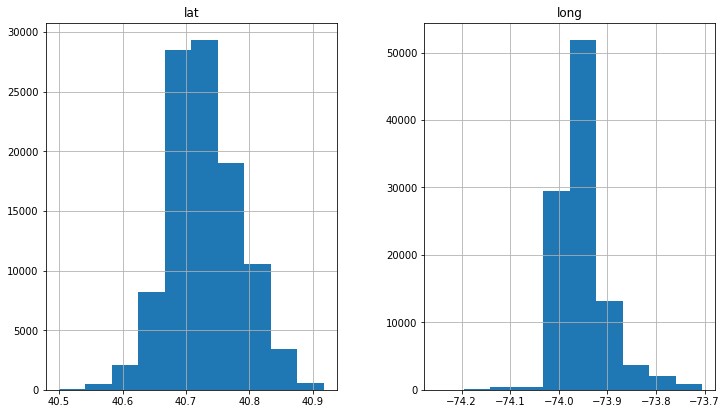

In [22]:
df[['lat', 'long']].hist()

Look at lat and long distribution, we can assure that all country and country_code values are the same (and the data source confirmed that too)

In [23]:
df.country.replace(np.nan, df.country.mode().iloc[0], inplace=True)
df.country_code.replace(np.nan, df.country_code.mode().iloc[0], inplace=True)

We can also replace lat & long missing value with mean value as it's distribution is not too skew

In [24]:
df.lat.replace(np.nan, df.lat.mean(), inplace=True)
df.long.replace(np.nan, df.long.mean(), inplace=True)

#### host_name, name

In [25]:
df.host_name.value_counts()

Michael               878
David                 761
John                  577
Alex                  543
Sonder (NYC)          516
                     ... 
Everett                 1
Maureen And Josiah      1
Marisa & Tom            1
Ish & Asa               1
Kahrej                  1
Name: host_name, Length: 13190, dtype: int64

In [26]:
df.name.value_counts()

Home away from home                                  33
Hillside Hotel                                       30
Water View King Bed Hotel Room                       30
Brooklyn Apartment                                   27
New york Multi-unit building                         27
                                                     ..
Modern & trendy serenity—great High Line location     1
Quiet, light-filled, Soho apartment                   1
Sunny and cozy room 10 minutes from Times Sq.61F3     1
1 bedroom apartment across the Central Park           1
Parisian Style Apartment in Heart of Brooklyn         1
Name: name, Length: 61281, dtype: int64

We have no clues so just leave these values as NaN. In case of further analysis like modeling, we can exclude name and host_name features


#### availability_365

In [27]:
df.availability_365.describe()

count    101610.000000
mean        141.043992
std         135.429156
min         -10.000000
25%           3.000000
50%          96.000000
75%         268.000000
max        3677.000000
Name: availability_365, dtype: float64

We seem to have outlier here as max value is 10 times bigger than 365, and it also has negative values

<AxesSubplot:>

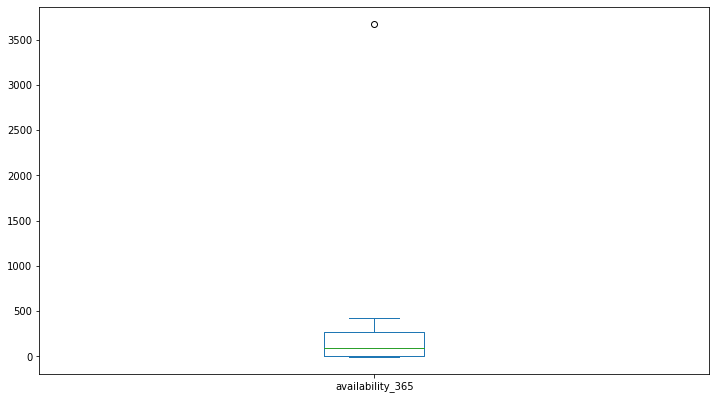

In [28]:
df.availability_365.plot(kind='box')

We have a outlier here.

Let's see how AirBnB describe this feature:

<code>avaliability_365</code>: The availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.

So that, these values must be >= 0 and <= 365. So we:
- Replace values that < 0 with 0; and > 365 with 365
- Replace NaN values with mode (=0). Because 0 outnumber all others, as it make about 24% cases

In [29]:
df.availability_365 =  df.availability_365.apply(lambda x: 0 if (x<0) else 365 if (x>365) else x)
df.availability_365.replace(np.nan, df.availability_365.median(), inplace=True)
df.availability_365 = df.availability_365.astype(int)

In [30]:
df.loc[df.last_review.isnull()]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0,NaT,0.0,5.0,1.0,352,1
20,1012382,Huge 2 BR Upper East Cental Park,79805143117,verified,Audrey,Manhattan,East Harlem,40.79685,-73.94872,United States,US,NaN,moderate,Entire home/apt,2013.0,$281,$56,7.0,0,NaT,0.0,3.0,2.0,347,1
27,1016248,Magnifique Suite au N de Manhattan - vue Cloitres,38811420224,verified,Adrianna,Manhattan,Inwood,40.86754,-73.92639,United States,US,NaN,strict,Private room,2017.0,$274,$55,4.0,0,NaT,0.0,NaN,1.0,96,1
37,1021771,Clean and Quiet in Brooklyn,26207748876,verified,Arthur,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,United States,US,False,moderate,Private room,2004.0,$203,$41,60.0,0,NaT,0.0,NaN,1.0,294,1
39,1022876,Country space in the city,49725315867,verified,Deanna,Brooklyn,Flatbush,40.63702,-73.96327,United States,US,True,strict,Private room,2011.0,"$1,020",$204,1.0,0,NaT,0.0,3.0,1.0,356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102035,57355267,rooms in sunny Loft right off the Bedford L stop,6043744134,verified,Anna,Brooklyn,Williamsburg,40.71612,-73.95983,United States,US,True,strict,Private room,2009.0,$138,NaN,22.0,0,NaT,0.0,4.0,2.0,0,1
102037,57356371,Bx Apartment,11038605149,unconfirmed,Vii,Bronx,Olinville,40.88438,-73.86397,United States,US,True,strict,Private room,2008.0,$531,NaN,1.0,0,NaT,0.0,3.0,1.0,0,0
102045,57360790,Private Bedroom in Rego Park / Forest Hills,15978912806,unconfirmed,NaN,Queens,Rego Park,40.72460,-73.85688,United States,US,False,moderate,Private room,2006.0,NaN,NaN,1.0,0,NaT,0.0,3.0,1.0,0,0
102051,57364103,"A cozy getaway, home away from home",55697801194,verified,Isaiah,Brooklyn,East New York,40.66130,-73.89088,United States,US,True,moderate,Private room,NaN,$147,NaN,1.0,0,NaT,0.0,4.0,1.0,88,0


#### minimum_nights
minimum number of night stay for the listing (calendar rules may be different)

In [31]:
df.minimum_nights.describe()

count    101658.000000
mean          8.126640
std          30.616698
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum_nights, dtype: float64

Outliers: negative values and max value indicated that. So we do the same as availability_365 with negative values.  
And NaN values will be replaced by median

In [32]:
df.minimum_nights =  df.minimum_nights.apply(lambda x: 0 if (x<0) else 365 if x > 365 else x)
df.minimum_nights.replace(np.nan, df.minimum_nights.median(), inplace=True)
df.minimum_nights = df.minimum_nights.astype(int)

In [33]:
df.minimum_nights.value_counts()

1      25290
2      23495
3      16438
30     11554
4       6606
       ...  
142        1
198        1
81         1
43         1
34         1
Name: minimum_nights, Length: 126, dtype: int64

As we can see, the required minimum_nights with 1, 2, 3 days and 1 month (30 days) make up the majority of the listings


#### <code>calculated_host_listings_count</code>
The number of listings the host has in the current scrape, in the city/region geography.

In [34]:
df.calculated_host_listings_count.describe()

count    101739.000000
mean          7.936937
std          32.266355
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         332.000000
Name: calculated_host_listings_count, dtype: float64

75% values of this feature are lower then 2, but the range is so high as the max value is 332!

<AxesSubplot:>

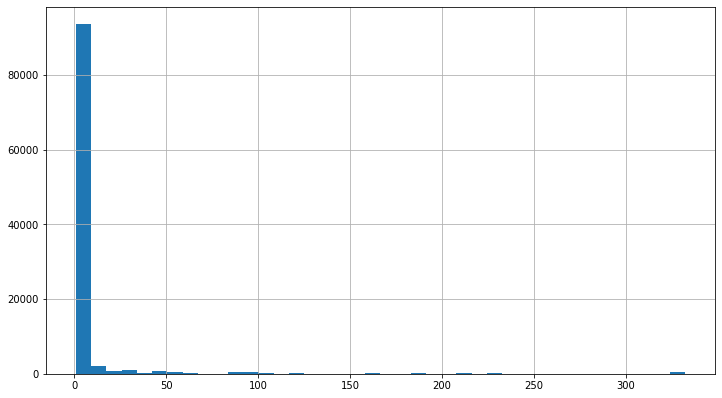

In [35]:
df.calculated_host_listings_count.hist(bins=40)

<AxesSubplot:>

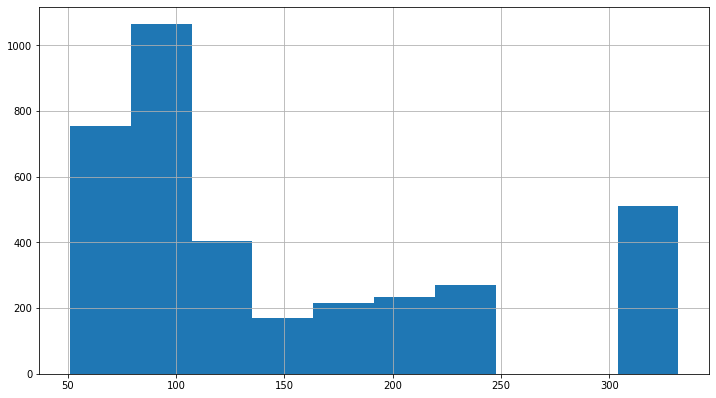

In [36]:
temp = df.calculated_host_listings_count
temp.loc[temp>50].hist()

At this point, we don't know if there are outliers or not. For the histogram of value that > 50, we can see that these values may still have some meaning to us. So that, we just fill missing values with median=1 and pay attention to these later

In [37]:
chlc_median = df.calculated_host_listings_count.median()
df.calculated_host_listings_count.replace(np.nan, chlc_median, inplace=True)
df.calculated_host_listings_count = df.calculated_host_listings_count.astype(int)

#### <code>review_rate_number</code>

In [38]:
df.review_rate_number.describe()

count    101739.000000
mean          3.278733
std           1.285089
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: review_rate_number, dtype: float64

In [39]:
df.review_rate_number.value_counts()

5.0    23251
4.0    23200
3.0    23130
2.0    22972
1.0     9186
Name: review_rate_number, dtype: int64

I can not find the definition for this feature, and basic statistic and value counting could not address any meaning from them. So for this, we just clean it:
- Replace missing values with median value
- Convert value type to integer

In [40]:
df.review_rate_number.replace(np.nan, df.review_rate_number.median(), inplace=True)
df.review_rate_number = df.review_rate_number.astype(int)

#### <code>host_identity_verified</code>

In [41]:
df.host_identity_verified.value_counts()

unconfirmed    50944
verified       50825
Name: host_identity_verified, dtype: int64

There are 2 categorical values and the ratio between them is close to 1:1. So for the missing values, we could consider it as unconfirmed

In [42]:
df.host_identity_verified.replace(np.nan, 'unconfirmed', inplace=True)

#### <code>service_fee</code> and <code>price</code>

In [43]:
df.service_fee.describe()

count     101785
unique       231
top        $216 
freq         523
Name: service_fee, dtype: object

In [44]:
df.price.describe()

count     101811
unique      1151
top        $206 
freq         135
Name: price, dtype: object

Because of having dollar sign ($) and an ending blank space, pandas give these feature the object dtype. Let's format them

In [45]:
df.service_fee = df.service_fee.loc[~df.service_fee.isnull()].apply(lambda x: str(x).replace("$","").replace(" ","").replace(",",""))
df.service_fee = df.service_fee.astype(float)

In [46]:
df.price = df.price.loc[~df.price.isnull()].apply(lambda x: str(x).replace("$","").replace(" ","").replace(",",""))
df.price = df.price.astype(float)

In [47]:
df[['service_fee', 'price']].describe()

,service_fee,price
count,101785.000000,101811.000000
mean,125.039249,625.355580
std,66.325905,331.672649
min,10.000000,50.000000
25%,68.000000,340.000000
50%,125.000000,625.000000
75%,183.000000,913.000000
max,240.000000,1200.000000


array([[<AxesSubplot:title={'center':'service_fee'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

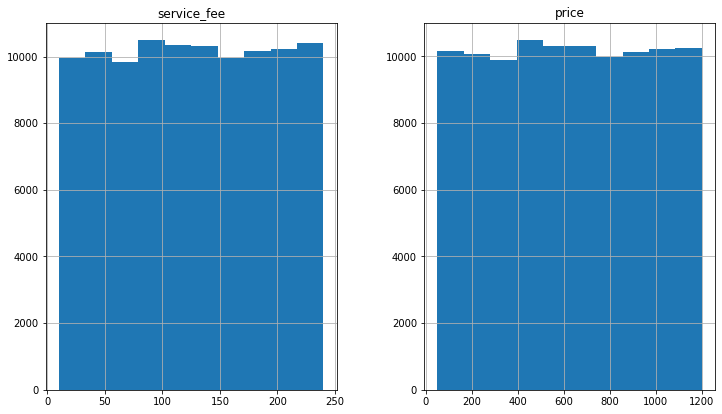

In [48]:
df[['service_fee', 'price']].hist()

Service_fee & and price looks so good. Their value range is in a reasonable range, and the histogram shows a rectangular shape. My question is, is there any correlation between service_fee and price

In [49]:
df[['service_fee', 'price']].corr()

,service_fee,price
service_fee,1.000000,0.999991
price,0.999991,1.000000


corr value very close to 1, meaning a strong relation here

<AxesSubplot:xlabel='service_fee', ylabel='price'>

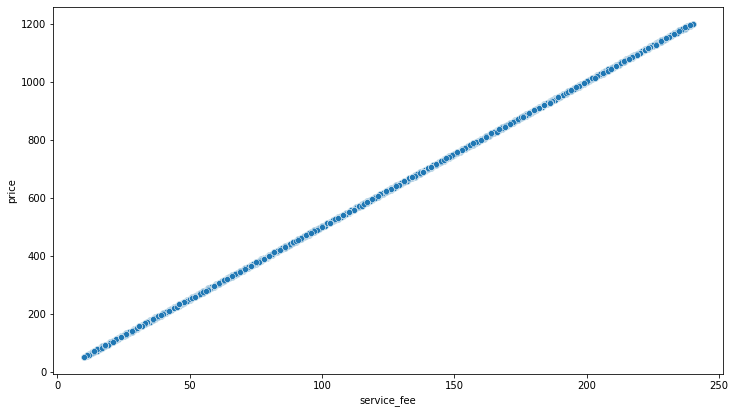

In [50]:
sns.scatterplot(x=df.service_fee, y=df.price)

So we can conclude that, high room price comes with high service_price
Let's find the ratio price/service_fee ratio, so we can use it to calculate missing values

In [51]:
(df.price/df.service_fee).describe() 

count    101572.000000
mean          5.000322
std           0.028805
min           4.818182
25%           4.990291
50%           5.000000
75%           5.009804
max           5.200000
dtype: float64

The result looks good, with mean=median, and a small std.  
The ratio we need to find is around 5, that means service_fee is usually 1/5 of room price. So that we could replace missing values of 2 features by the equation: price = service_fee * 5 and service_fee = price / 5

(Alternatively, we can use **Linear Regression** to estimate the slope for the function: Price = β1 + β2.Service_fee)

Finally, in case both features are missing, we replace them with median

In [52]:
ps_ratio = (df.price/df.service_fee).median() #=5
df.loc[df.service_fee.isnull(), 'service_fee'] = df.loc[df.service_fee.isnull(), 'price'] / ps_ratio
df.loc[df.price.isnull(), 'price'] = df.loc[df.price.isnull(), 'service_fee'] * ps_ratio

In [53]:
df.service_fee.replace(np.nan, df.service_fee.median(), inplace=True)
df.price.replace(np.nan, df.price.median(), inplace=True)

#### <code>construction_year</code>

<AxesSubplot:>

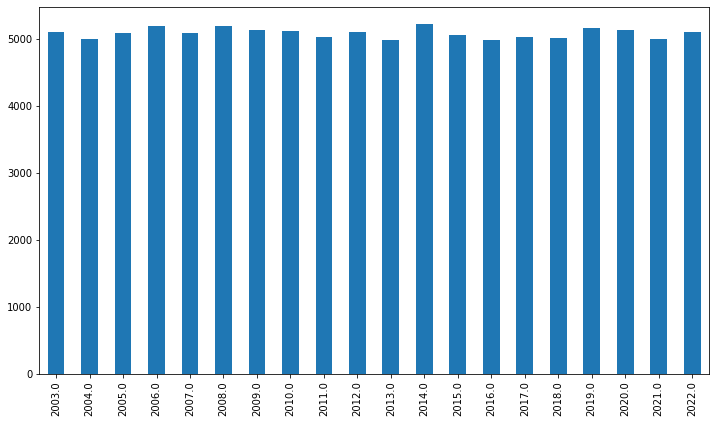

In [54]:
df.construction_year.value_counts().sort_index().plot(kind='bar')

We see a rectangular shape again, the distribution is quite uniform. Because I can not find any clue to match missing value of construction_year, so I just leave them as what they are. We can drop these missing values

In [55]:
df.dropna(subset=['construction_year'], inplace=True)

#### <code>instant_bookable</code> & <code>cancellation_policy</code>

In [56]:
df[['instant_bookable', 'cancellation_policy']].value_counts().sort_index()

instant_bookable  cancellation_policy
False             flexible               16788
                  moderate               17238
                  strict                 17055
True              flexible               17008
                  moderate               16845
                  strict                 16814
dtype: int64

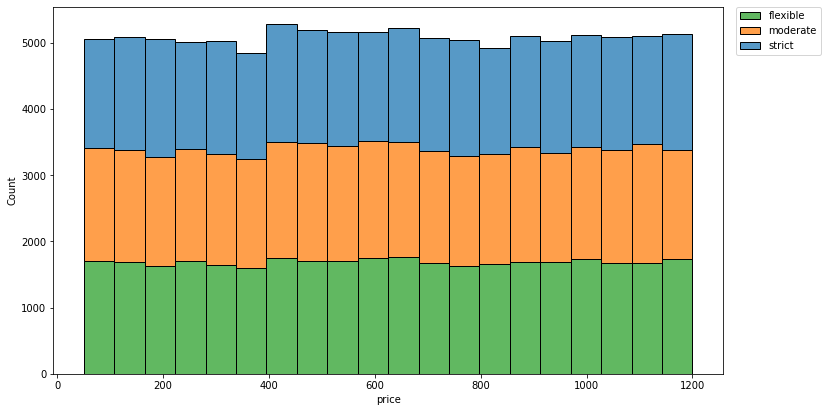

In [57]:
sns.histplot(data = df, x='price', hue='cancellation_policy', bins=20, multiple='stack')
plt.legend(labels = ['flexible','moderate','strict'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


<AxesSubplot:xlabel='price', ylabel='Count'>

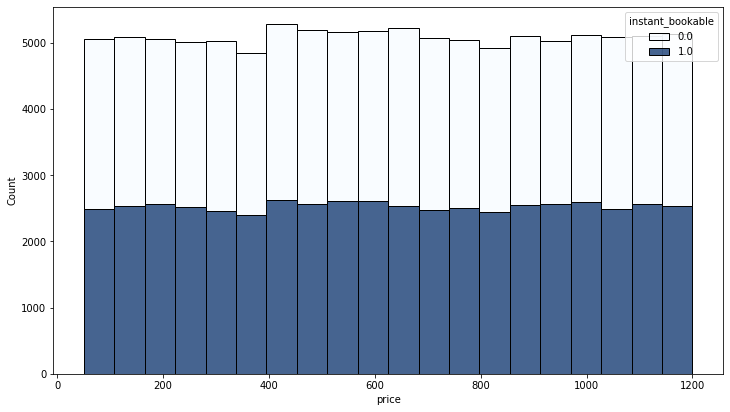

In [58]:
sns.histplot(data = df, x='price', hue='instant_bookable', bins=20, multiple='stack', palette='Blues')

instance_bookable and cancellation_policy values count are so equal, they do not affect price as well. We can replace missing values of instant_bookable with False, and cancellation_policy with moderate

In [59]:
df.instant_bookable.replace(np.nan, 'False', inplace=True)
df.cancellation_policy.replace(np.nan, 'moderate', inplace=True)

#### <code>neighbourhood</code> & <code>neighbourhood_group</code>

In [60]:
neighbour = df[['neighbourhood','neighbourhood_group']].groupby(by=['neighbourhood_group','neighbourhood']).size().reset_index().rename(columns={0:'count'})
neighbour

,neighbourhood_group,neighbourhood,count
0,Bronx,Allerton,95
1,Bronx,Baychester,27
2,Bronx,Belmont,45
3,Bronx,Bronxdale,46
4,Bronx,Castle Hill,22
...,...,...,...
221,Staten Island,Westerleigh,5
222,Staten Island,Willowbrook,3
223,Staten Island,Woodrow,3
224,brookln,South Slope,1


In [61]:
df.neighbourhood.value_counts()

Bedford-Stuyvesant        7880
Williamsburg              7712
Harlem                    5427
Bushwick                  4950
Hell's Kitchen            3940
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

In [62]:
df.neighbourhood_group.value_counts()

Manhattan        43467
Brooklyn         41533
Queens           13179
Bronx             2691
Staten Island      948
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

There are 226 pairs of (neighbourhood_group, neighbourhood) while neighbourhood has only 224 values. Maybe the missing typing in neighbourhood_group causes it. Let's find out

In [63]:
duplicated_nbh = neighbour.loc[neighbour.neighbourhood.duplicated(), 'neighbourhood'].to_list()
neighbour.loc[neighbour.neighbourhood.isin(duplicated_nbh)]

,neighbourhood_group,neighbourhood,count
91,Brooklyn,South Slope,562
97,Manhattan,Chelsea,2271
224,brookln,South Slope,1
225,manhatan,Chelsea,1


Found it. Let's replace the last 2 neighbourhood_group values above with their rightly first capitalize format

In [64]:
df.neighbourhood_group.replace('brookln', 'Brooklyn', inplace=True)
df.neighbourhood_group.replace('manhatan', 'Manhattan', inplace=True)

In [65]:
df.loc[(df.neighbourhood.isnull()) & (df.neighbourhood_group.isnull()), ['id', 'name']]

,id,name


Now we can fill missing values of neighbourhood_group by paired values we found. In this dataset, these 2 features are not simultaneously missing, so all empty values of neighbourhood_group will be filled.  
With neighbourhood missing values, I suggest dropping them (16 records). In case we still need these record, a KNN classification model could be used to find neighbourhood

In [66]:
neighbour = df[['neighbourhood','neighbourhood_group']].groupby(by=['neighbourhood_group','neighbourhood']).size().reset_index().rename(columns={0:'count'})
neighbour_dict = dict(zip(df.neighbourhood, df.neighbourhood_group))
df.loc[df.neighbourhood_group.isnull(), 'neighbourhood_group'] \
    = df.loc[df.neighbourhood_group.isnull(), 'neighbourhood'].map(neighbour_dict)

In [67]:
df.dropna(subset=['neighbourhood'], inplace=True)

#### Remaining missing values

In [68]:
df.isnull().sum().sort_values(ascending=False)

last_review                       15772
host_name                           399
name                                241
id                                    0
construction_year                     0
availability_365                      0
calculated_host_listings_count        0
review_rate_number                    0
reviews_per_month                     0
number_of_reviews                     0
minimum_nights                        0
service_fee                           0
price                                 0
cancellation_policy                   0
room_type                             0
instant_bookable                      0
country_code                          0
country                               0
long                                  0
lat                                   0
neighbourhood                         0
neighbourhood_group                   0
host_identity_verified                0
host_id                               0
house_rules                           0


In [69]:
df.to_csv('./output/AirBnB_cleandata.csv')

Until now, we have done most of the work.  
Next, I will use Tableau to visualize data

<a id="data_visualization"></a>

## Data Visualization


In this section, I will use Tableau to visualize some feature of this dataset  
This is a interactive dashboard, that you can hover over map, or select each Neighborhood Group of the "Average Reviews per Month" chart to filter the data  
[Link](https://public.tableau.com/views/AirBnBOpenData-NYCListingVisualization/AirBnBOpenData?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link) to my public visualization


In [70]:
%%html
<div class='tableauPlaceholder' id='viz1662607583382' style='position: relative'>
    <noscript>
        <a href='#'>
        <img alt='AirBnB Open Data ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirBnBOpenData-NYCListingVisualization&#47;AirBnBOpenData&#47;1_rss.png' style='border: none' /></a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> 
        <param name='site_root' value='' />
        <param name='name' value='AirBnBOpenData-NYCListingVisualization&#47;AirBnBOpenData' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ai&#47;AirBnBOpenData-NYCListingVisualization&#47;AirBnBOpenData&#47;1.png' /> 
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
        <param name='filter' value='publish=yes' />
    </object>
</div>                
<script type='text/javascript'>                    
    var divElement = document.getElementById('viz1662607583382');
    var vizElement = divElement.getElementsByTagName('object')[0];                    
    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1366px';vizElement.style.height='795px';} 
    else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1366px';vizElement.style.height='795px';} 
    else { vizElement.style.width='100%';vizElement.style.height='1427px';}                     
    var scriptElement = document.createElement('script');                    
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

## Author

Truong Hong Thai
